In [3]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [78]:
# READ IN DATA FOR SYSTEMS/REPS & STORE AS A DICTIONARY FOR EACH SYSTEM

df_6j8e = dict()
df_6j8e['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP1_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6j8e['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP2_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6j8e['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8E_REP3_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])

df_6agf = dict()
df_6agf['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP1_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6agf['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP2_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6agf['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6AGF_REP3_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])

df_6uzh = dict()
df_6uzh['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP1_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6uzh['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP2_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6uzh['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZH_REP3_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])

df_6uzr = dict()
df_6uzr['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP1_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6uzr['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP2_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6uzr['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6UZR_REP3_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])

df_6j8g = dict()
df_6j8g['rep1'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP1_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6j8g['rep2'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP2_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])
df_6j8g['rep3'] = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/0-250-400-500/6J8G_REP3_bottlenecks.csv", usecols=['Fenestration', 'Snapshot', 'Bottleneck radius'])


In [79]:
def add_frames(df, x, fenestration):
    closed_tunn_fr = x - len(df)
    while closed_tunn_fr > 0:
        df.loc[len(df)] = [fenestration, '-', 0.75]
        closed_tunn_fr -= 1
    return df


def frames_up_to(df, x):
    """Returns new df with the snapshot number x with below threshold frames added in for each fenestration"""
    df_d12 = add_frames(df[(df['Fenestration'] == 'D1-2') & (df['Snapshot'] <= x)], x, 'D1-2')
    df_d23 = add_frames(df[(df['Fenestration'] == 'D2-3') & (df['Snapshot'] <= x)], x, 'D2-3')
    df_d34 = add_frames(df[(df['Fenestration'] == 'D3-4') & (df['Snapshot'] <= x)], x, 'D3-4')
    df_d14 = add_frames(df[(df['Fenestration'] == 'D1-4') & (df['Snapshot'] <= x)], x, 'D1-4')
    df_concat = pd.concat([df_d12, df_d23, df_d34, df_d14], ignore_index=True)
    return df_concat


def frames_up_to_allreps(df_dict, frames):
    new_df_dict = dict()
    for key, val in df_dict.items():
        new_df_dict[key] = frames_up_to(df_dict[key], frames)
    # df_newdict = dict()
    # dx = frames_up_to(df_dict['rep1'], frames)
    # df_newdict['rep2'] = frames_up_to(df_dict['rep2'], frames)
    # df_newdict['rep3'] = frames_up_to(df_dict['rep3'], frames)
    return new_df_dict

/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

<AxesSubplot:xlabel='Bottleneck radius', ylabel='Probability'>

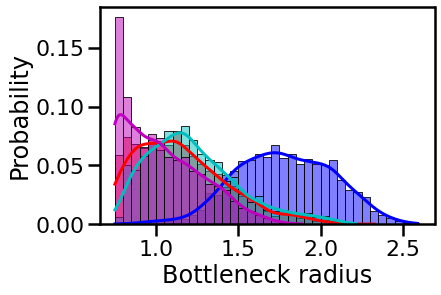

In [101]:

sns.histplot(frames_up_to_allreps(df_6agf, 2000)['rep1'][frames_up_to_allreps(df_6agf, 2000)['rep1']['Fenestration'] == 'D1-2']['Bottleneck radius'], stat='probability', binwidth=0.05, kde='True', label='D1-2', color='b')
sns.histplot(frames_up_to_allreps(df_6agf, 2000)['rep1'][frames_up_to_allreps(df_6agf, 2000)['rep1']['Fenestration'] == 'D2-3']['Bottleneck radius'], stat='probability', binwidth=0.05, kde='True', label='D2-3', color='r')
sns.histplot(frames_up_to_allreps(df_6agf, 2000)['rep1'][frames_up_to_allreps(df_6agf, 2000)['rep1']['Fenestration'] == 'D3-4']['Bottleneck radius'], stat='probability', binwidth=0.05, kde='True', label='D3-4', color='c')
sns.histplot(frames_up_to_allreps(df_6agf, 2000)['rep1'][frames_up_to_allreps(df_6agf, 2000)['rep1']['Fenestration'] == 'D1-4']['Bottleneck radius'], stat='probability', binwidth=0.05, kde='True', label='D1-4', color='m')

/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

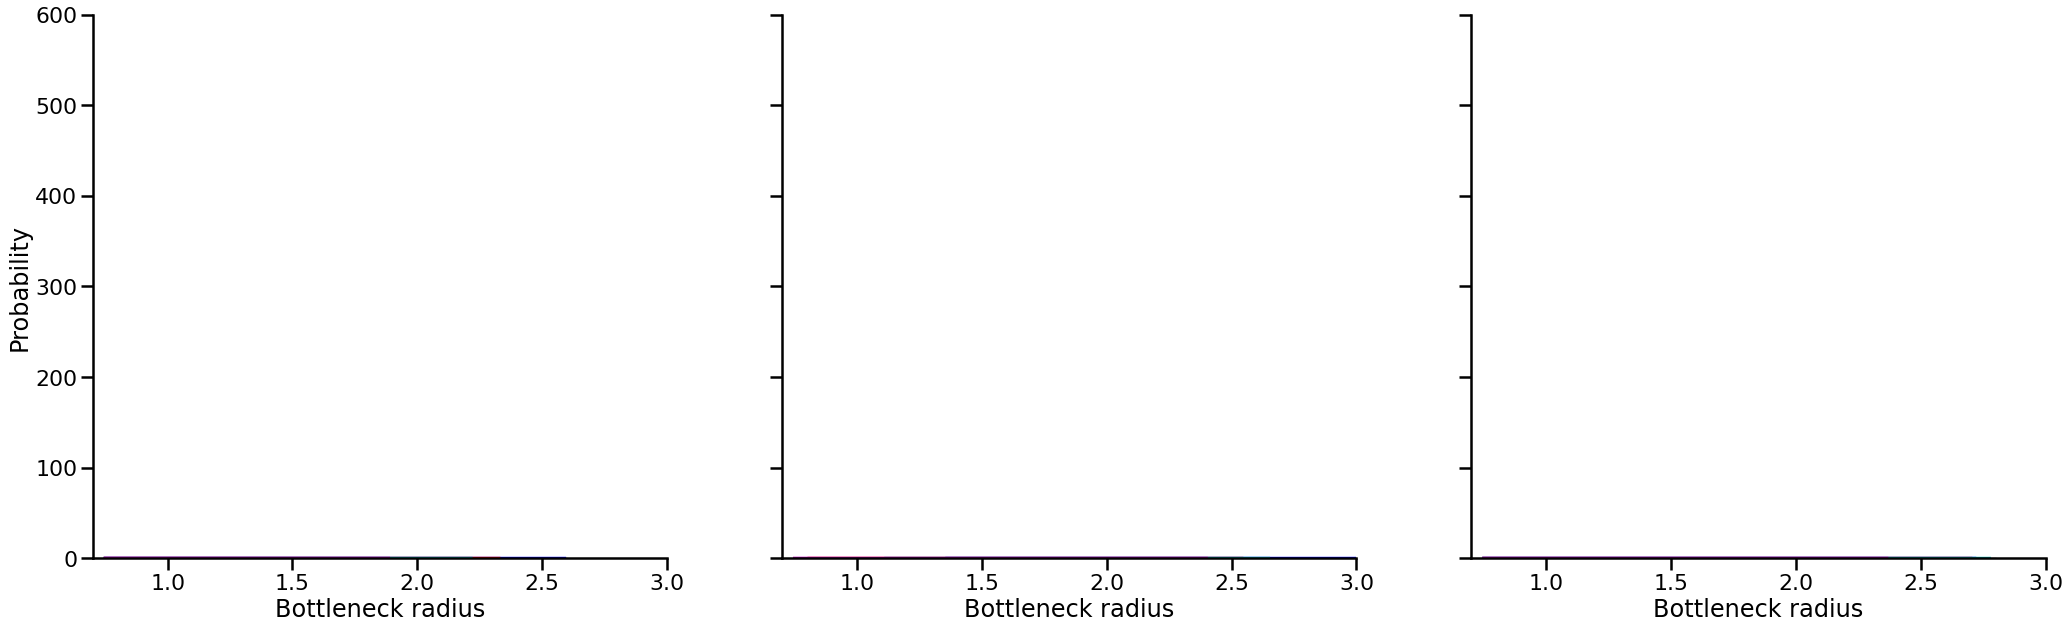

In [98]:
sns.set_context("poster")
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(35,10))
plt.ylim(0, 600)
plt.xlim(0.7, 3.0)
sns.despine()
plot_snshists(frames_up_to_allreps(df_6agf, 2000)['rep1'], axes[0])
plot_snshists(frames_up_to_allreps(df_6agf, 2000)['rep2'], axes[1])
plot_snshists(frames_up_to_allreps(df_6agf, 2000)['rep3'], axes[2])

#print(frames_up_to_allreps(df_6agf, 2000)['rep3'].tail())


In [89]:
def generate_fig(dfs, frames):
    sns.set_context("poster")
    fig, axes = plt.subplots(5, 3, sharey=True, sharex=True, figsize=(35,50))
    plt.ylim(0, 600)
    plt.xlim(0.7, 3.0)
    sns.despine()
    # fig.suptitle(str(int(frames/10))+'ns', size=48, weight='heavy', ha='right', va='bottom', x=0.98, y=0.02)
    i = 0
    while i < len(frames):
        plot_snshists(frames_up_to(dfs['rep1'], frames[i]), axes[i, 0])
        plot_snshists(frames_up_to(dfs['rep2'], frames[i]), axes[i, 1])
        plot_snshists(frames_up_to(dfs['rep3'], frames[i]), axes[i, 2])
        axes[i, 0].set_title("Rep 1", size=24)
        axes[i, 1].set_title("Rep 2", size=24)
        axes[i, 2].set_title("Rep 3", size=24)
        axes[i, 0].axvspan(0.7, 0.8, alpha=0.5, color='grey')
        axes[i, 1].axvspan(0.7, 0.8, alpha=0.5, color='grey')
        axes[i, 2].axvspan(0.7, 0.8, alpha=0.5, color='grey')
        i += 1
    # plt.legend()
    # plt.savefig('/Users/Elaine/png2gif/1.7/'+str(frames)+'.png')


/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/elaine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

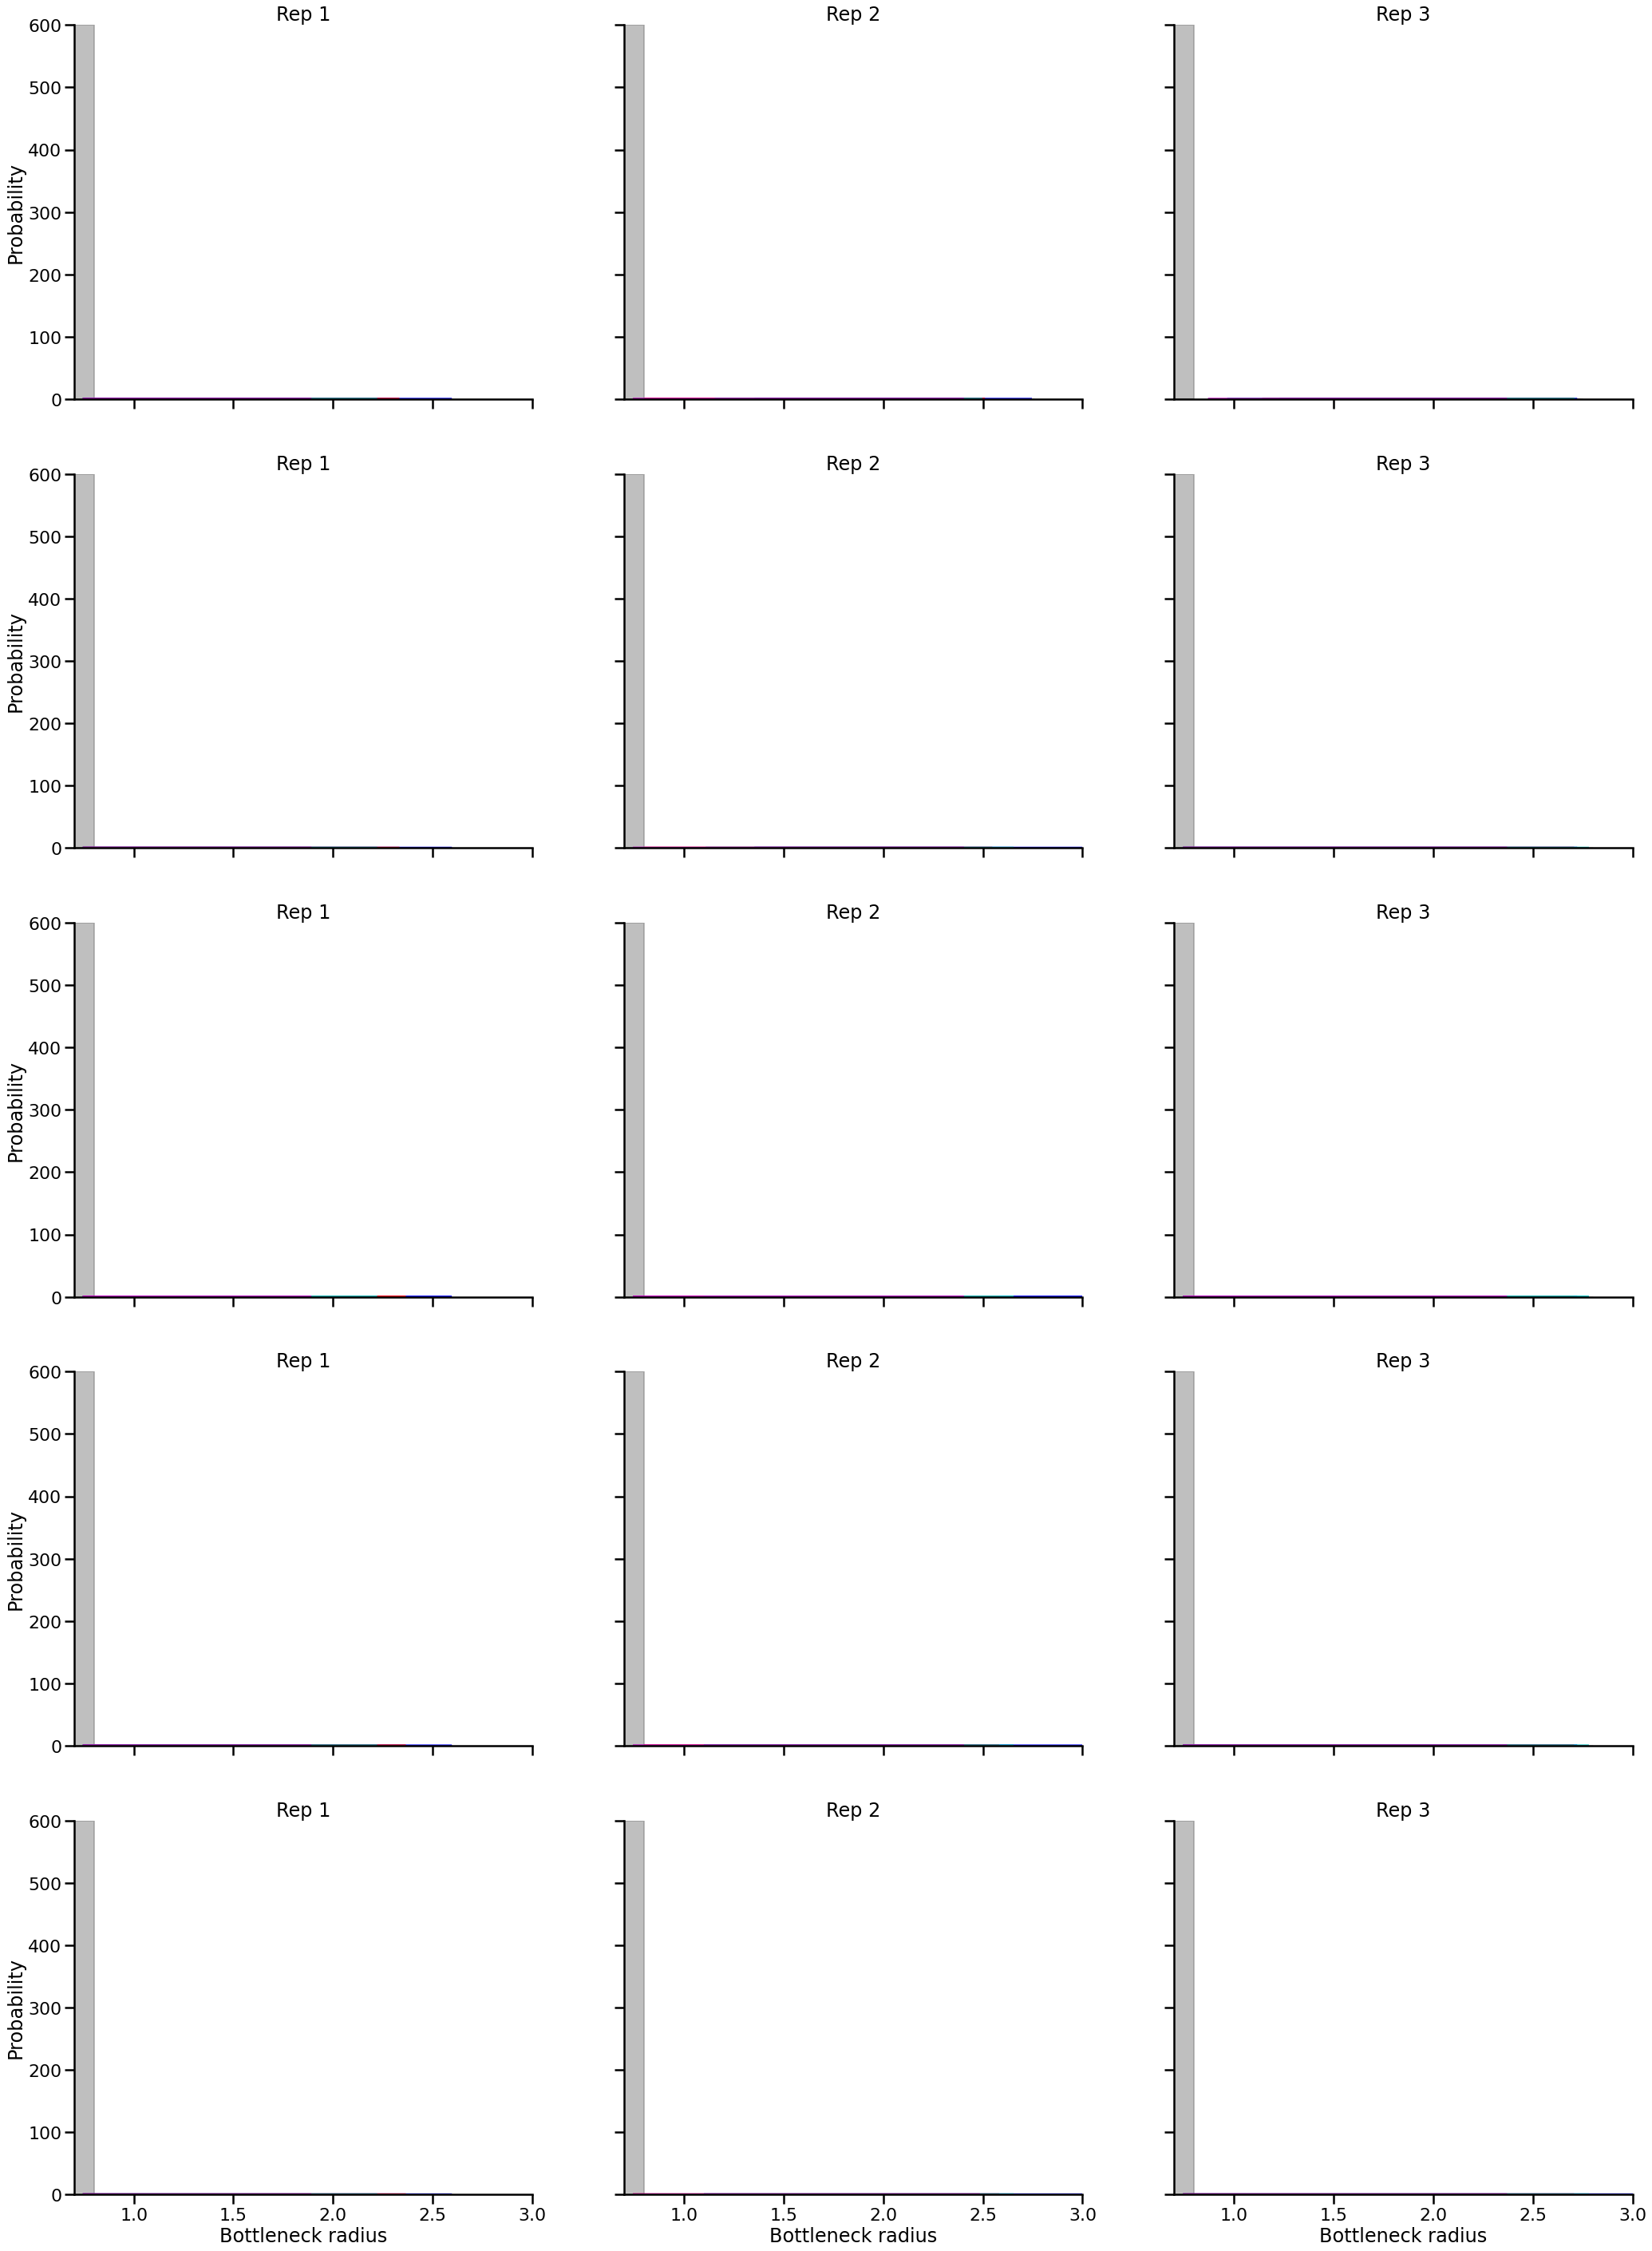

In [86]:
generate_fig(df_6agf, [1000,2000,3000,4000,5000])

In [1]:
def plot_hists(df_pdb):

    plot_figrow(df_pdb, 1000, 0, "0-100ns")
    plot_figrow(df_pdb, 2000, 1, "0-200ns")
    plot_figrow(df_pdb, 3000, 2, "0-300ns")
    plot_figrow(df_pdb, 4000, 3, "0-400ns")
    plot_figrow(df_pdb, 5000, 4, "0-500ns")

    plt.legend()


KeyError: 0

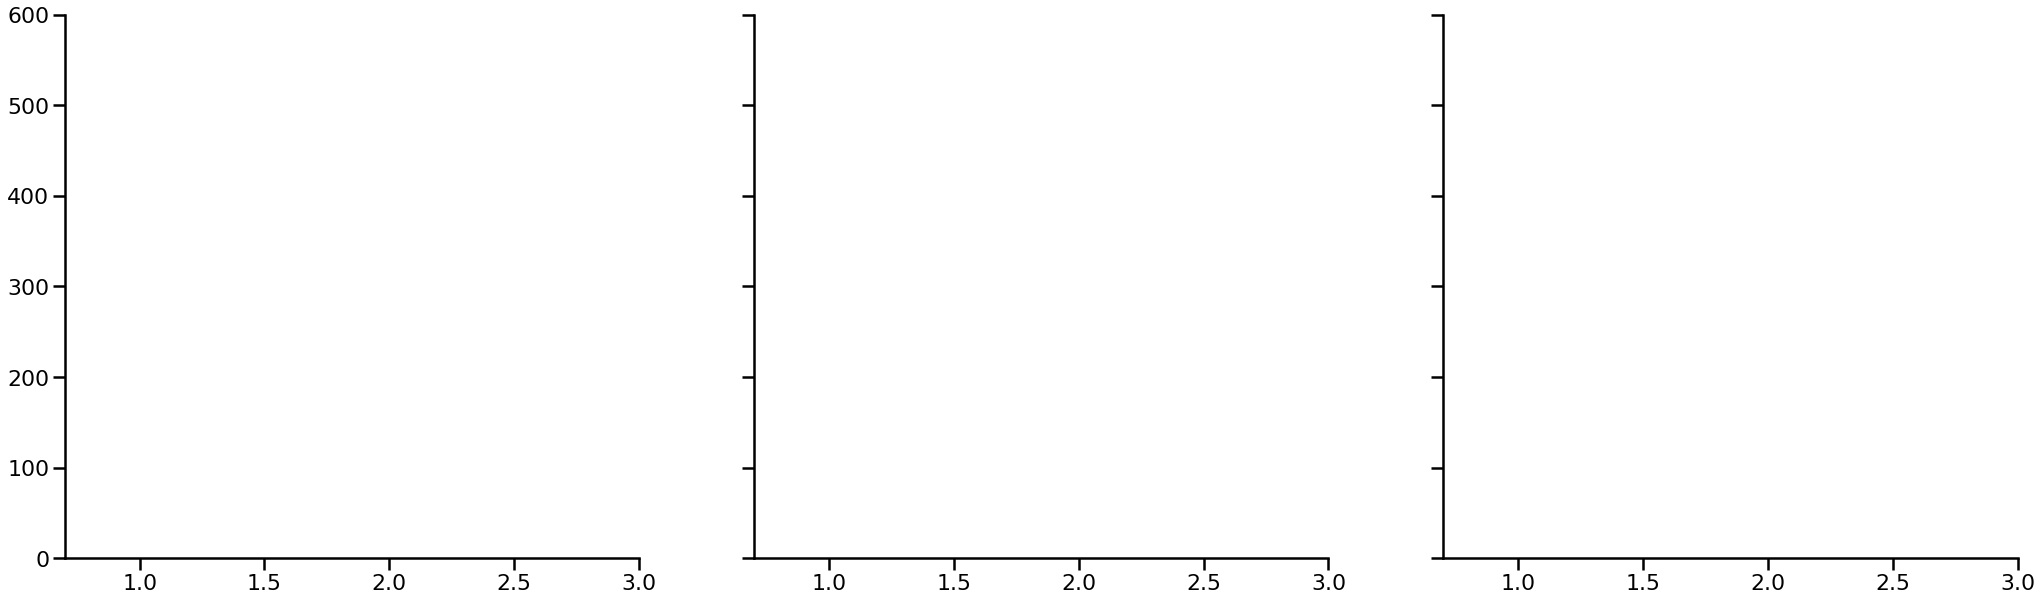

In [44]:
#fig, axes = plt.subplots(5, 3, figsize=(15, 25), sharex=True, sharey=True)
#fig.suptitle('6AGF (Nav1.4) Fenestration Bottleneck Radii : Convergence over simulation timecourse')
generate_fig_3reps(df_6agf, 1000)

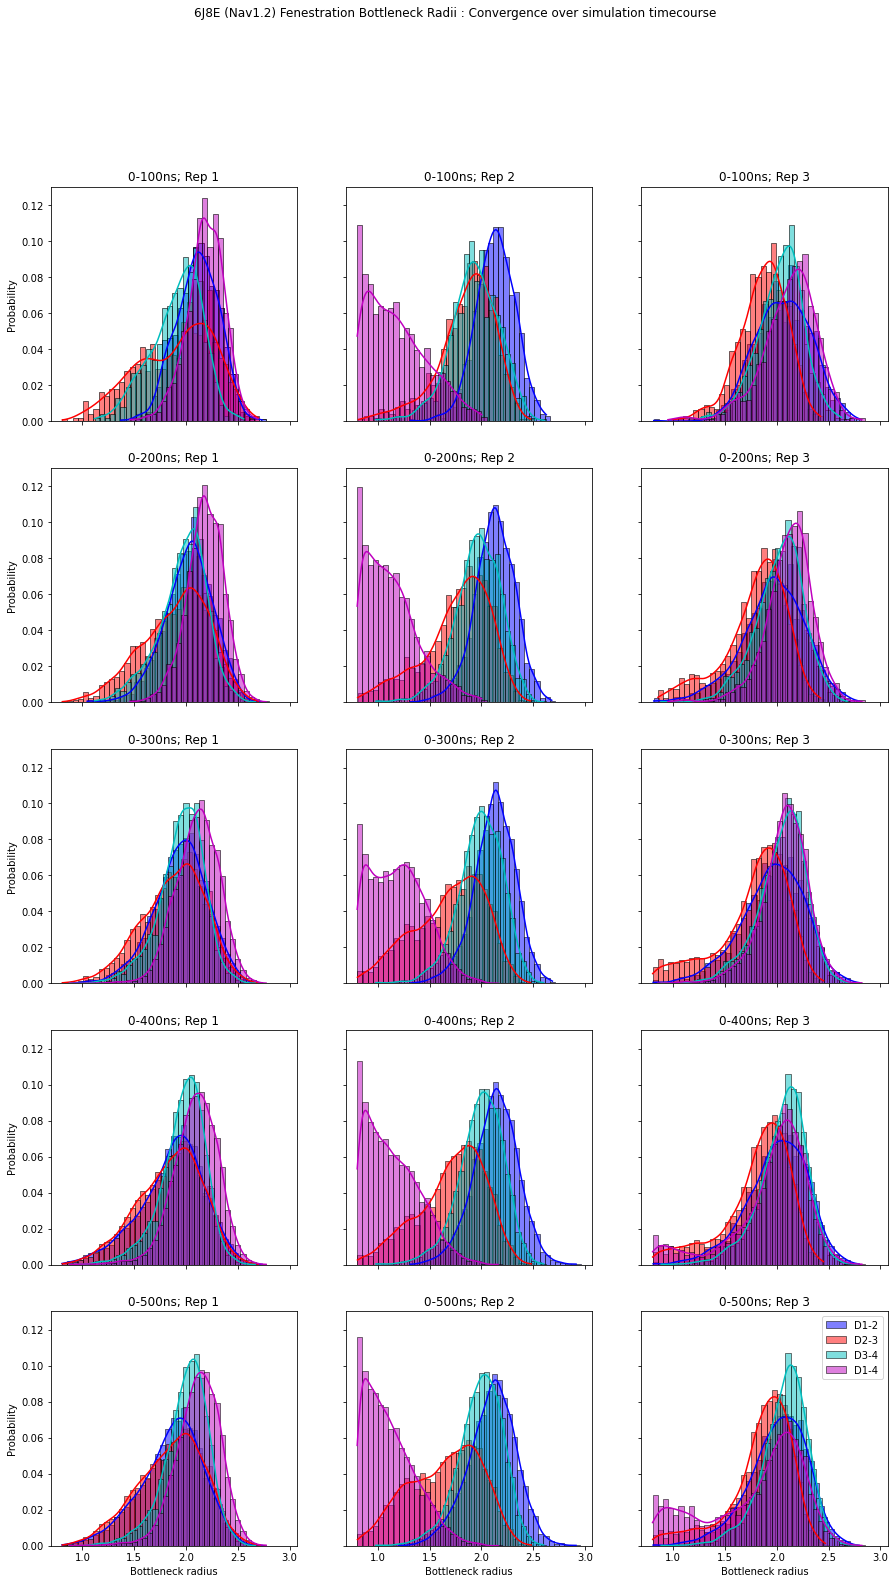

In [19]:
plot_hists(df_6j8e, '6J8E (Nav1.2) Fenestration Bottleneck Radii : Convergence over simulation timecourse')

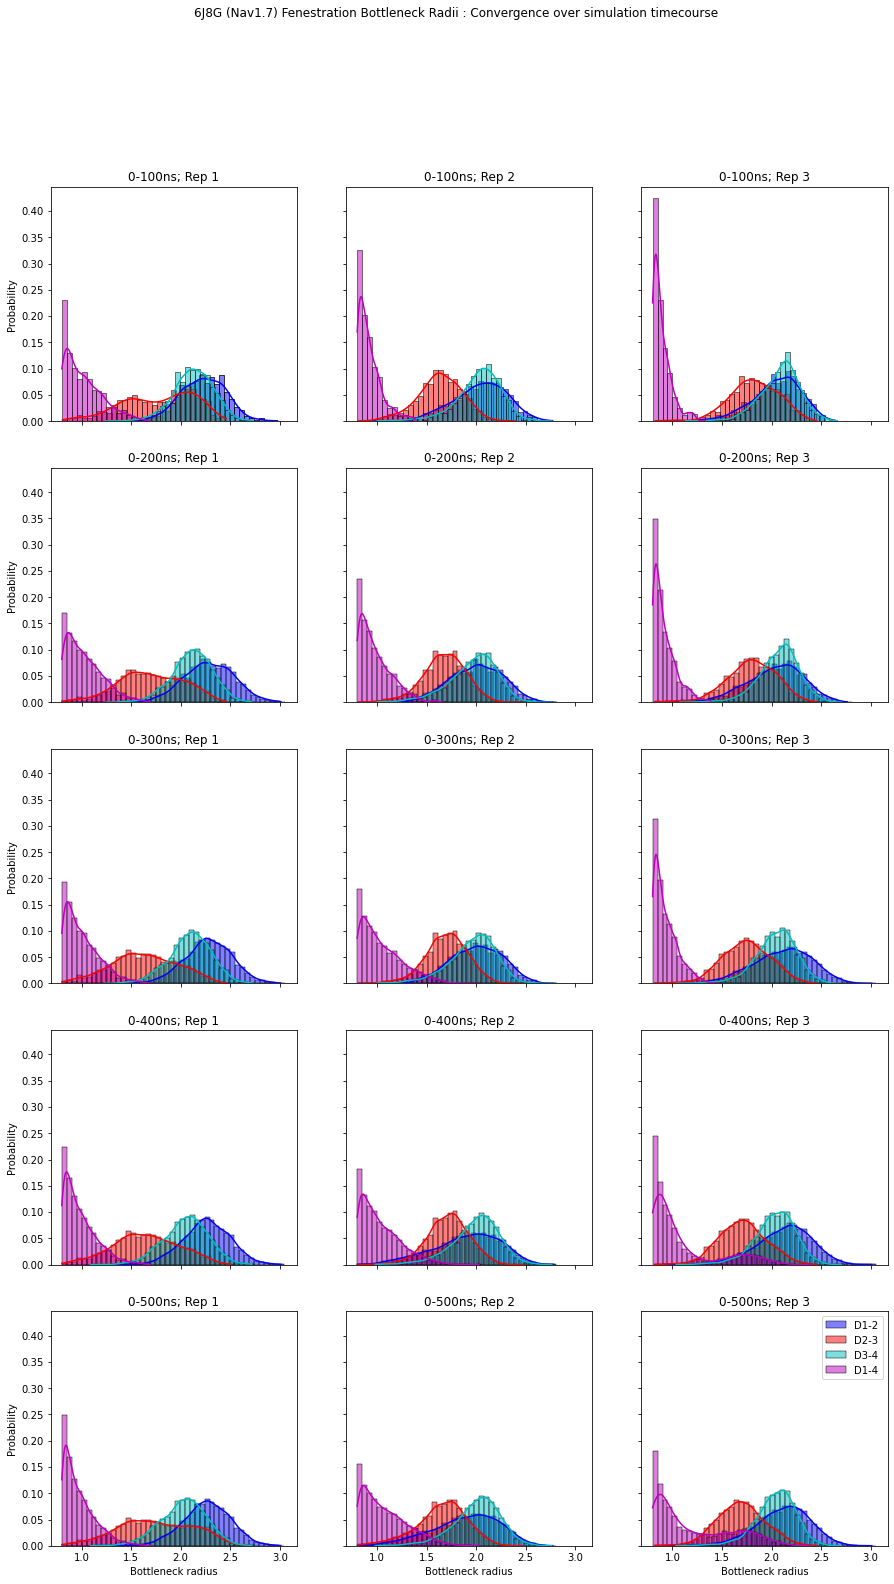

In [20]:
plot_hists(df_6j8g, '6J8G (Nav1.7) Fenestration Bottleneck Radii : Convergence over simulation timecourse')

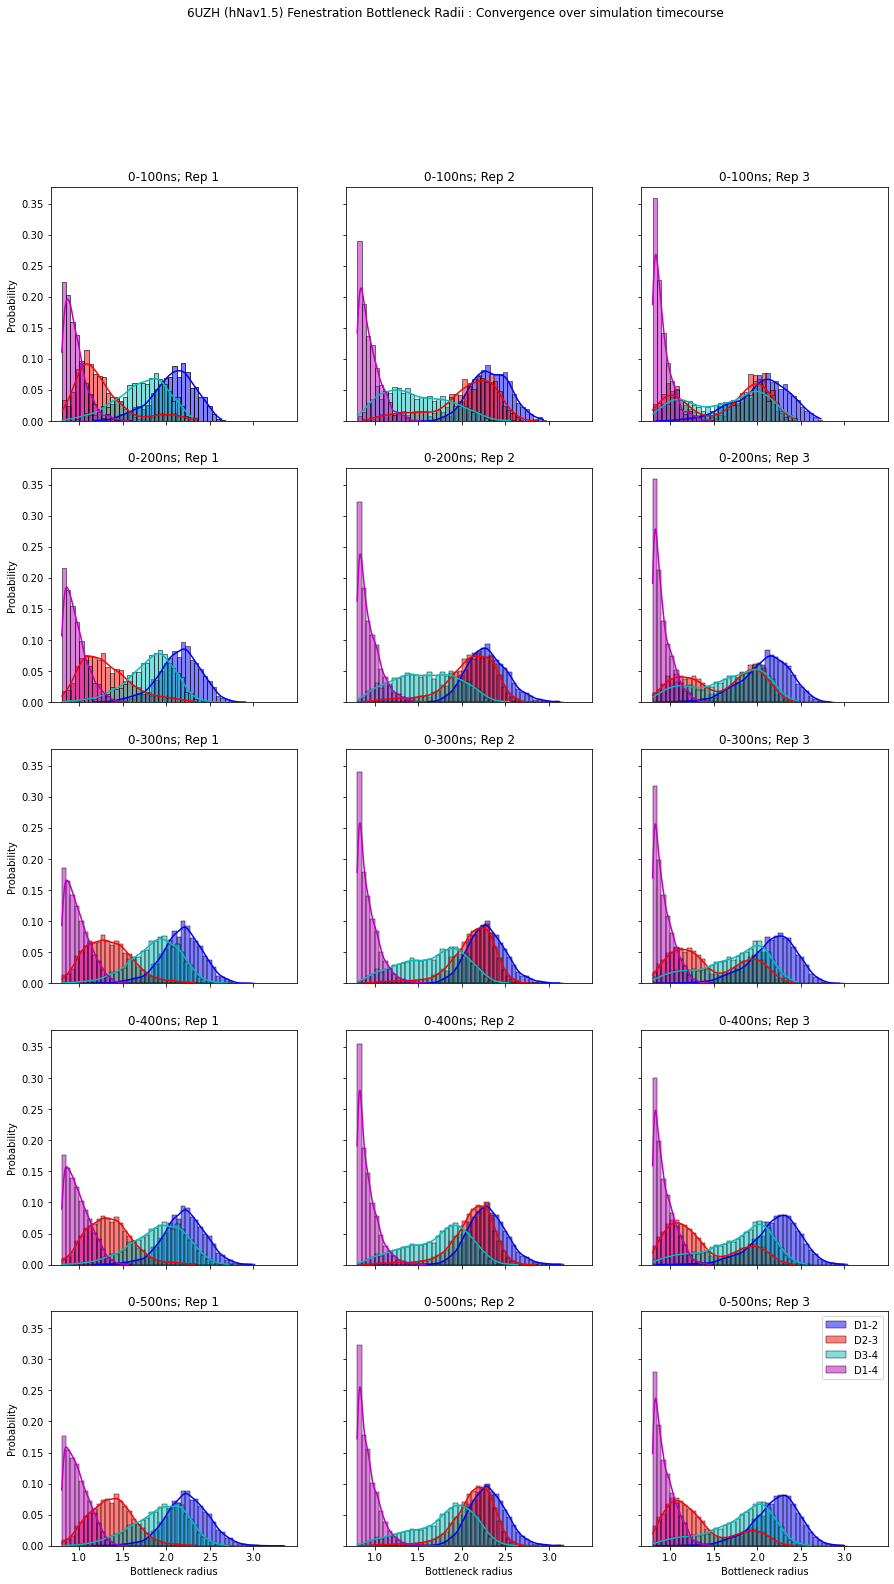

In [21]:
plot_hists(df_6uzh, '6UZH (hNav1.5) Fenestration Bottleneck Radii : Convergence over simulation timecourse')

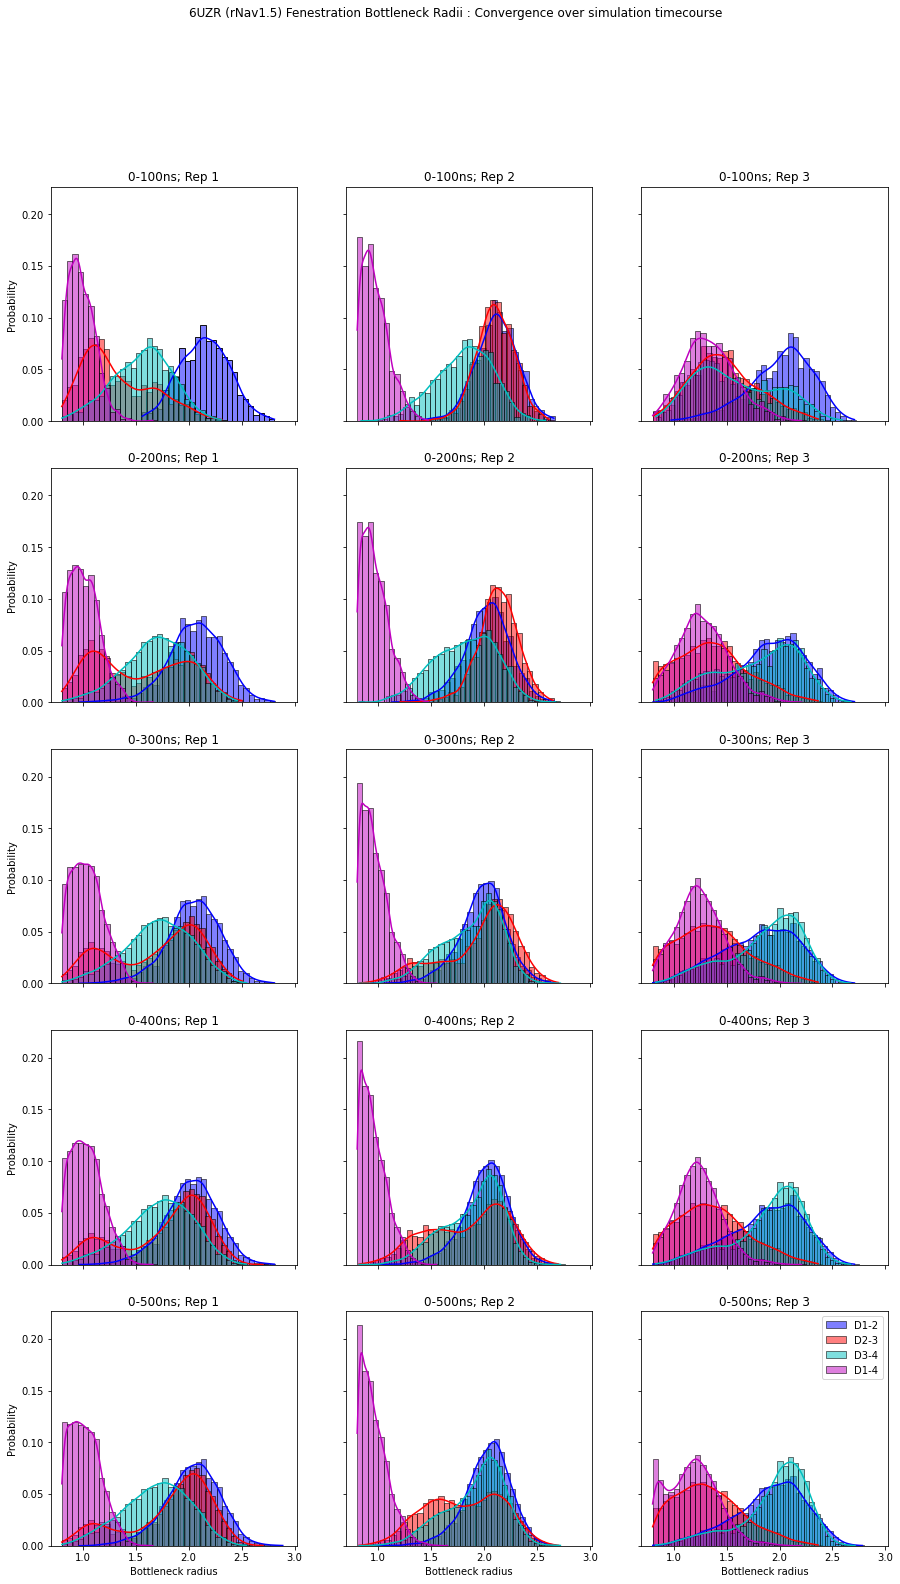

In [22]:
plot_hists(df_6uzr, '6UZR (rNav1.5) Fenestration Bottleneck Radii : Convergence over simulation timecourse')